<a href="https://colab.research.google.com/github/akaumov/tensorflow-intro/blob/master/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Basics. Training first model.**

Farengeit function

In [0]:
def F(x):
  return x*1.8 + 32

In [100]:
import numpy as np

celcius_values = np.array([])
farengheit_values = np.array([])

for value in range(0,32,3):
  celcius_values = np.append(celcius_values, value)
  farengheit_values = np.append(farengheit_values, F(value))
  print("Celcius = {} Farengheit = {}".format(value, F(value)))
  
print("values => {} {}".format(celcius_values, farengheit_values))
  

Celcius = 0 Farengheit = 32.0
Celcius = 3 Farengheit = 37.4
Celcius = 6 Farengheit = 42.8
Celcius = 9 Farengheit = 48.2
Celcius = 12 Farengheit = 53.6
Celcius = 15 Farengheit = 59.0
Celcius = 18 Farengheit = 64.4
Celcius = 21 Farengheit = 69.80000000000001
Celcius = 24 Farengheit = 75.2
Celcius = 27 Farengheit = 80.6
Celcius = 30 Farengheit = 86.0
values => [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30.] [32.  37.4 42.8 48.2 53.6 59.  64.4 69.8 75.2 80.6 86. ]


In [0]:
import tensorflow as tf

In [0]:
#setup tensor flow logger

import logging

logger = tf.get_logger();
logger.setLevel(logging.ERROR)

# Create the model

## Build a layer


*   input_shape=[1] - Tells that we will use for input single value. That is, shape is a one-dimensional array;
*   units=1 - Tells use only one neuron in the layer. Also it shows that this layer will have only one output




In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Build model from layers

In [0]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer functions


*   Loss function - shows how far predicted value from desired value
*   Optimizer function - adjust internal values to reduce the loss



In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

**fit** function trains the model by using loss function and optimizer function. We provide to train function input and output values. Trainig function adjusts internal weights by using optimizer function.

In [0]:
history = model.fit(celcius_values, farengheit_values, epochs=1000, verbose=False)

## Display training statistics

The graphic below shows how loss is reduce in each training epoch

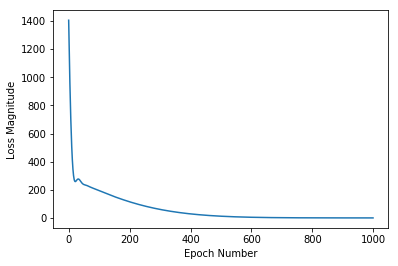

In [107]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [108]:
print(history.history)

{'loss': [1405.24853515625, 1282.836669921875, 1167.5550537109375, 1059.5120849609375, 958.7926025390625, 865.4500122070312, 779.5049438476562, 700.942138671875, 629.7046508789062, 565.69287109375, 508.7593078613281, 458.7075500488281, 415.2903137207031, 378.2085266113281, 347.1122741699219, 321.6026611328125, 301.2362976074219, 285.5306396484375, 273.9719543457031, 266.0246887207031, 261.1423645019531, 258.7795104980469, 258.4041748046875, 259.51031494140625, 261.6287536621094, 264.3373718261719, 267.2686767578125, 270.11492919921875, 272.63116455078125, 274.6347961425781, 276.0030212402344, 276.6687316894531, 276.61383056640625, 275.8622741699219, 274.4710998535156, 272.523193359375, 270.11846923828125, 267.3663024902344, 264.37872314453125, 261.2646789550781, 258.1247863769531, 255.0478973388672, 252.10801696777344, 249.36343383789062, 246.85540771484375, 244.6088409423828, 242.63330078125, 240.92449951171875, 239.46661376953125, 238.23471069335938, 237.1970672607422, 236.3179626464

## Use the model to predict values

In [109]:
print("Predicted value = {}".format(model.predict([100])))

Predicted value = [[213.22672]]


In [110]:
print("Actual value = {}".format(F(100)))

Actual value = 212.0


## Looking at the  layer weights

In [111]:
print("Layer weights: {}".format(l0.get_weights()))

Layer weights: [array([[1.8154931]], dtype=float32), array([31.677406], dtype=float32)]


## Experiment

What if we will create model with more layers?

Predicted value = [[211.99998]]
l0 weights = [array([[ 0.19962843,  0.26450288, -0.22746368,  0.67283803]],
      dtype=float32), array([ 2.2246635, -2.1612318, -3.567558 ,  3.3391297], dtype=float32)]
l1 weights = [array([[-0.25712562, -0.9965878 , -0.5419399 ,  0.59698653],
       [-0.2271307 , -0.7422582 ,  0.7256927 , -0.73679763],
       [-0.4657185 ,  0.08045019,  1.3263716 , -0.3244974 ],
       [ 1.2156268 ,  0.79801756, -0.7576834 ,  0.8108033 ]],
      dtype=float32), array([ 2.0793805 ,  0.94006115, -3.3915505 ,  3.8177447 ], dtype=float32)]
l2 weights = [array([[ 0.62481993],
       [ 0.10158627],
       [-1.2756698 ],
       [ 0.64653116]], dtype=float32), array([2.917945], dtype=float32)]


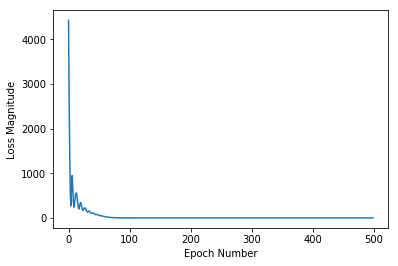

In [112]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celcius_values, farengheit_values, epochs=500, verbose=False)

import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

print("Predicted value = {}".format(model.predict([100])))

print("l0 weights = {}".format(l0.get_weights()))
print("l1 weights = {}".format(l1.get_weights()))
print("l2 weights = {}".format(l2.get_weights()))

## Experiment 2

Try to predict y(x) = x *x function

In [113]:
def F2(x):
  return x * x

f2_input_values = np.array([])
f2_output_values = np.array([])

for value in range (0, 25, 2):
  f2_input_values = np.append(f2_input_values, value)
  f2_output_values = np.append(f2_output_values, F2(value))

print("F2 values input = {} output = {}".format(f2_input_values, f2_output_values))
  

F2 values input = [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24.] output = [  0.   4.  16.  36.  64. 100. 144. 196. 256. 324. 400. 484. 576.]


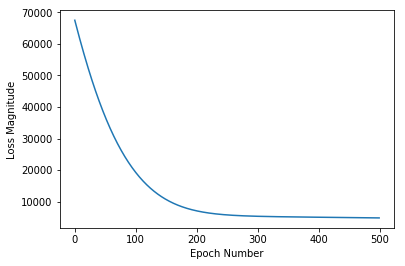

In [114]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(f2_input_values, f2_output_values, epochs=500, verbose=False)

import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

**Let's compare our predictions on 2D graphic**

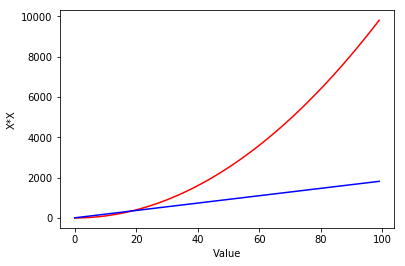

In [115]:
f2_input_test_values = np.array([])
f2_predicted_values = np.array([])
f2_actual_values = np.array([])

for value in range (0, 100, 1):
  f2_input_test_values = np.append(f2_input_test_values, value)
  f2_actual_values = np.append(f2_actual_values, F2(value))
  
f2_predicted_values = model.predict(f2_input_test_values)
import matplotlib.pyplot as plt

plt.xlabel("Value")
plt.ylabel("X*X")
plt.plot(f2_input_test_values, f2_actual_values, color='red')
plt.plot(f2_input_test_values, f2_predicted_values, color='blue')

### Summary:
System with one neuron can predict only linear data

### Let's try to model our function with more complex model with multiple neurons

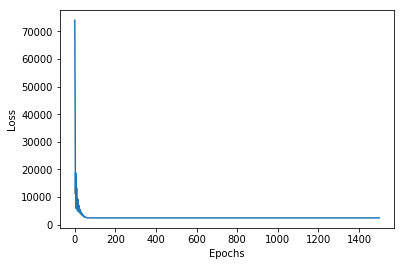

In [116]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=4)
l3 = tf.keras.layers.Dense(units=4)
l4 = tf.keras.layers.Dense(units=1)

model2 = tf.keras.Sequential([l0, l1, l2, l3, l4])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model2.fit(f2_input_values, f2_output_values, epochs=1500, verbose=False)

import matplotlib.pyplot as plt

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"])

l0 weights = [array([[ 0.677123  ,  0.6231817 , -1.2320571 , -0.02918212]],
      dtype=float32), array([-2.0138257 , -1.7390465 ,  1.818878  ,  0.43569595], dtype=float32)]
l1 weights = [array([[ 0.61810017, -0.59077907,  0.08970293, -0.0338339 ],
       [ 1.1667335 , -0.01417343, -0.11027879,  0.55111444],
       [-1.2482975 , -0.47288713, -0.04598625, -0.5208568 ],
       [-0.2920687 ,  0.04377712,  0.4687172 ,  0.25402486]],
      dtype=float32), array([-1.7240108, -1.5243961,  0.4025746, -2.1456573], dtype=float32)]
l2 weights = [array([[-0.3205944 , -1.0336658 ,  1.21049   ,  1.0542185 ],
       [ 0.45865443, -0.9952888 , -0.34725118,  0.45412236],
       [-0.19709736,  0.16565949,  0.03571049, -0.23584849],
       [-0.40807775, -0.8843031 ,  0.5090205 , -0.48165172]],
      dtype=float32), array([ 2.405302 ,  1.6560113, -1.4214064, -1.5055937], dtype=float32)]
l2 weights = [array([[-0.14080219, -0.9563805 , -0.5179615 , -0.9029623 ],
       [ 1.2644165 , -0.15845054, -0.44487762

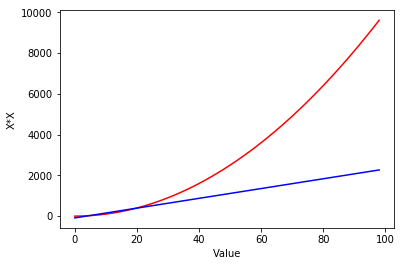

In [117]:
f2_input_test_values = np.array([])
f2_actual_values = np.array([])

for value in range (0, 100, 2):
  f2_input_test_values = np.append(f2_input_test_values, value)
  f2_actual_values = np.append(f2_actual_values, F2(value))
  
f2_predicted_values = model2.predict(f2_input_test_values)
import matplotlib.pyplot as plt

plt.xlabel("Value")
plt.ylabel("X*X")
plt.plot(f2_input_test_values, f2_actual_values, color='red')
plt.plot(f2_input_test_values, f2_predicted_values, color='blue')
print("l0 weights = {}".format(l0.get_weights()))
print("l1 weights = {}".format(l1.get_weights()))
print("l2 weights = {}".format(l2.get_weights()))
print("l2 weights = {}".format(l3.get_weights()))
print("l2 weights = {}".format(l4.get_weights()))

## Questions:


Why we can't model non-linear functions, is it because we use linear functions inside neurouns?

